# Exploratory Data Analysis - Hotel Bookings Demand

---

## 1.0 Objectives

- To find variables that affect the decision of a guest to cancel a hotel bookings
- To find out which country citizen made the most hotel bookings cancellation
- To find out the peak season on bookings hotel

## 2.0 Dataset Information

### 2.1 Description

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

### 2.2 Data Dictionary

| Variable                      | Definition                                             |
|--------------------------------|--------------------------------------------------------|
| hotel                          | Hotel (H1 = Resort Hotel or H2 = City Hotel)           |
| is_canceled                    | Value indicating if the booking was canceled (1) or not (0)                                                                                       |
| lead_time                      | Number of days that elapsed between the entering date of the booking into the Property Management System(PMS) and the arrival date                 |
| arrival_date_year              | Year of arrival date                                   |
| arrival_date_month             | Month of arrival date                                  |
| arrival_date_week_number       | Week number of year for arrival date                   |
| arrival_date_day_of_month      | Day of arrival date                                    |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                     |
| stays_in_week_nights           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                                                     |
| adults                         | Number of adults                                       |
| children                       | Number of children                                     |
| babies                         | Number of babies                                       |
| meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)                                                             |
| country                        | Country of origin. Categories are represented in the ISO 3155–3:2013 format                                                                        |
| market_segment                 | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                     |
| distribution_channel           | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                           |
| is_repeated_guest              | Value indicating if the booking name was from a repeated guest (1) or not (0)                                                                      |
| previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking                                                     |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking                                                     |
| reserved_room_type             | Code of room type reserved. Code is presented instead of designation for anonymity reasons.                                                        |
| assigned_room_type             | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.                                                                    |
| booking_changes                | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
| deposit_type                   | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.                             |
| agent                          | ID of the travel agency that made the booking          |
| company                        | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons                                                                                   |
| days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer                                                   |
| customer_type                  | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr                            | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights                                |
| required_car_parking_spaces    | Number of car parking spaces required by the customer  |
| total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                                                   |
| reservation_status             | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why                                                                   |
| reservation_status_date        | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel                                |

### 2.3 Acknowledgement & Source

The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.  
<br>
The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020.  ](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)  
<br>
Author of the Kaggle Dataset: [Jesse Mostipak](https://www.kaggle.com/jessemostipak)  
Link to the Kaggle Dataset: [Hotel Booking Demand Dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand)  
<br>
GitHub Repository Author: [lukes](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)  
Link to GitHub Repository for Countries with Regional Code: [Country Code CSV](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

---

## 3.0 Import Library and Load Dataset

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./hotel_bookings.csv')

In [6]:
country_code = pd.read_csv('./country_code.csv', index_col='alpha-3')
country_code = country_code.drop('country-code', axis=1)

## 4.0 Setting the Graph Style

In [7]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['figure.dpi'] = 150
sns.set_style("white")

## 5.0 Constant Variable

In [8]:
DATASET_TOTAL_INSTANCES = len(df)

## 6.0 Statistics Summary of Dataset

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

## 7.0 Data Cleaning

Finding which variables contains missing value

In [12]:
col_sum_na = df.isnull().sum()
has_na = col_sum_na > 0
col_with_na = df.columns[has_na]

print(col_with_na)

Index(['children', 'country', 'agent', 'company'], dtype='object')


In [330]:
col_sum_na.sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

Calculate the percentages of missing instances in the variable

In [14]:
(col_sum_na / DATASET_TOTAL_INSTANCES * 100)[has_na].sort_values(ascending=False)

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

By referring to the data dictionary above, variable *company* and *agent* is the ID that uniquely identify themselves. Most of the time, ID don't provide value to increase the hotel booking demands. On top of that, variable *company* and *agent* contains 94.31% and 13.69% missing data respectively. Thus, it is safe to drop these two columns.

In [15]:
df = df.drop(['company', 'agent'], axis=1)

0.41% instances of the dataset has missing value on variable *country* which is doable to drop these instances since it less than 1% of the total instances in the dataset

In [16]:
df = df.dropna(subset=['country'])

As for the variable *children* contains 0.003% of the instances consists of missing value, this is likely the guests don't have any children and leaving it empty. Therefore, the missing value in variable *children* will be replace with zero.

In [17]:
df['children'] = df['children'].fillna(0)

Final check to verify are there any columns still contains missing value

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Update the dataset total instances

In [19]:
DATASET_TOTAL_INSTANCES = len(df)

## 8.0 Preprocess Data

### 8.1 Convert Country Code to Country Name

Before mapping the country code in the dataset to country name, we have to ensure the country code is alpha-3 format specified by the ISO

In [20]:
country_code_lst = pd.Series(df['country'].unique())
is_country_code_len_three = country_code_lst.apply(lambda code: len(code)) != 3
country_code_lst[is_country_code_len_three]

14    CN
dtype: object

In [21]:
country_code_lst[country_code_lst.apply(lambda code: len(code)) != 3]

14    CN
dtype: object

From above we found out that contains a country code is in alpha-2 format which is required to convert it to alpha-3 format.  

The alpha-3 format country code for CN is CHN.  

In [22]:
df['country'][df['country'] == 'CN'] = 'CHN'

/Users/ming-jiayong/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Convert country code to country name for the dataset

In [23]:
df['country'] = df['country'].apply(lambda code: country_code.loc[code][0])

## 9.0 Exploring the dataset

### Dataset Groupby Hotel Type

In [161]:
df_groupby_hotel = df.groupby('hotel')

### Helper Function

In [173]:
def convert_pct_df(dataframe, feature, groupby_index=None, top=10):
    dataframe = dataframe[feature].value_counts(normalize=True)
    
    if groupby_index:
        dataframe = dataframe.loc[groupby_index][:top]
    
    return dataframe.mul(100).rename('percent').reset_index()

### 9.1 Percentage of Guests Cancelled Their Hotel Bookings

In [163]:
hotel_cancel_pct = convert_pct_df(df_groupby_hotel, 'is_canceled')

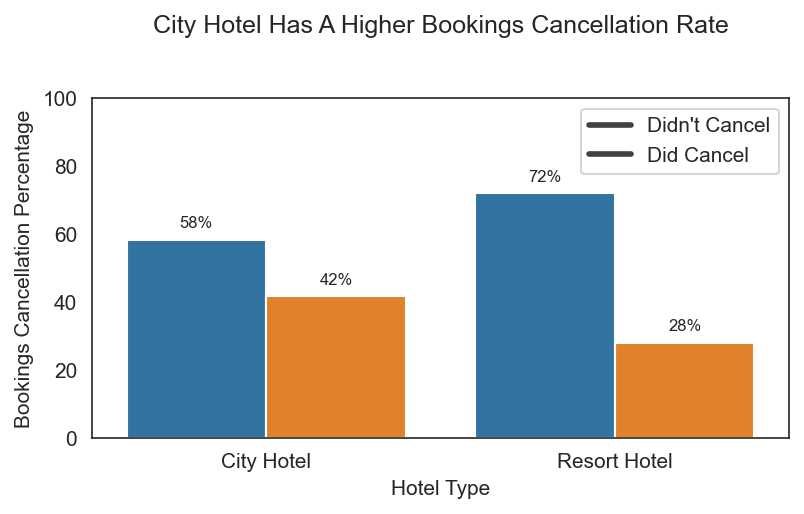

In [164]:
ax = sns.barplot(data=hotel_cancel_pct, x='hotel', y='percent', hue='is_canceled')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'City Hotel Has A Higher Bookings Cancellation Rate\n\n',
    'xlabel': 'Hotel Type',
    'ylabel': 'Bookings Cancellation Percentage',
    'ylim': (0, 100),
}    
ax.set(**props)
plt.legend(loc='best', labels=["Didn't Cancel", "Did Cancel"])
plt.show()

Guests that book city hotel has 14% higher booking cancellation rate than resort hotel. The booking cancellation rate for city hotel and resort hotel are 42% and 28% respectively

### 9.2 Top 10 Countries that Contributed Bookings Cancellation Rate

In [178]:
country_cancel_pct_resort_hotel = convert_pct_df(df_groupby_hotel, 'country', 'Resort Hotel')

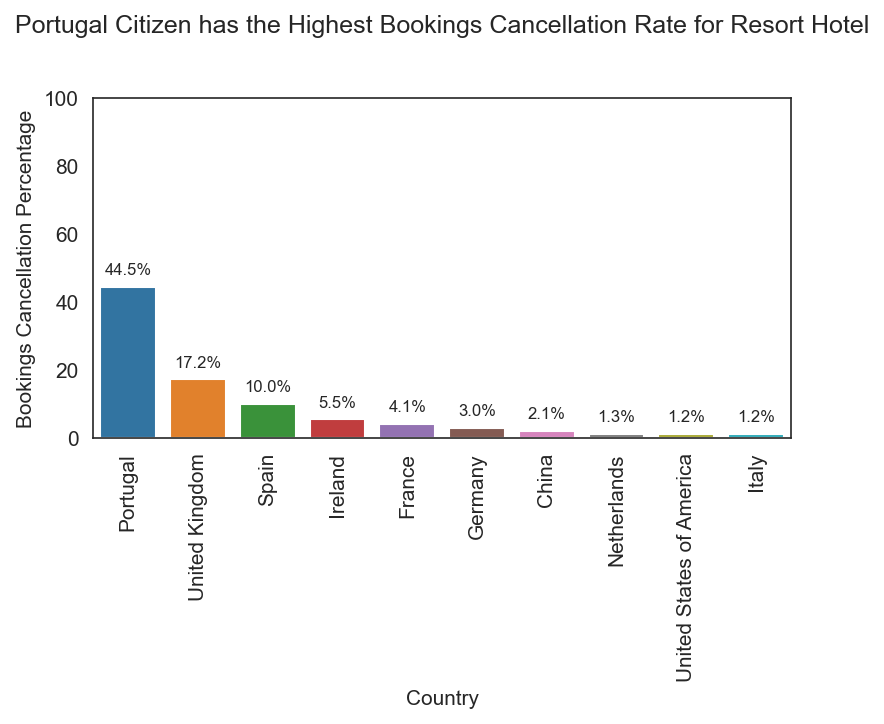

In [179]:
ax = sns.barplot(data=country_cancel_pct_resort_hotel, x='country', y='percent')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'Portugal Citizen has the Highest Bookings Cancellation Rate for Resort Hotel\n\n',
    'xlabel': 'Country',
    'ylabel': 'Bookings Cancellation Percentage',
    'ylim': (0, 100)
}    
ax.set(**props)
plt.xticks(rotation=90)
plt.show()

In [180]:
country_cancel_pct_city_hotel = convert_pct_df(df_groupby_hotel, 'country', 'City Hotel')

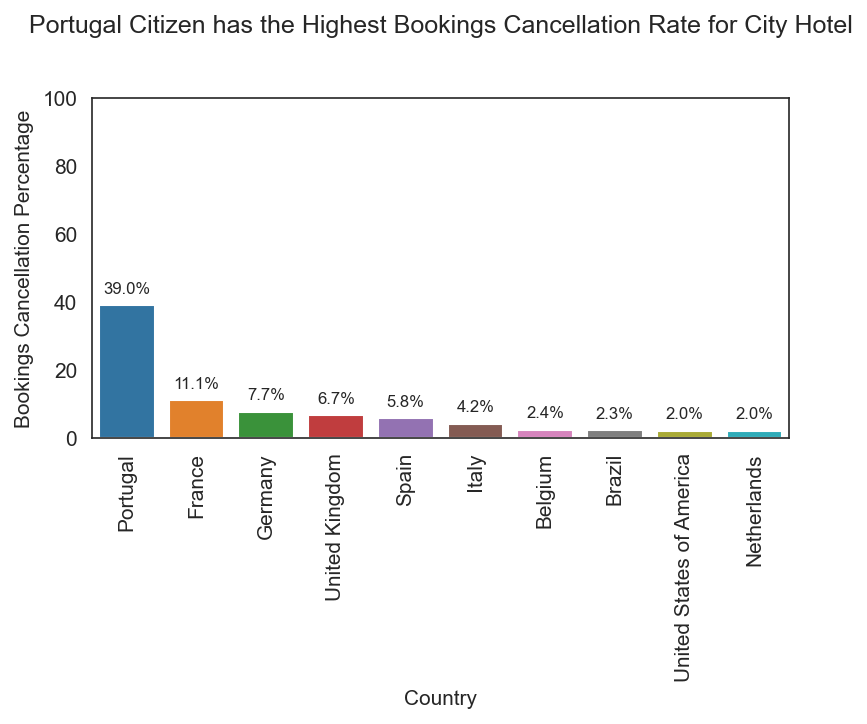

In [181]:
ax = sns.barplot(data=country_cancel_pct_city_hotel, x='country', y='percent')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'Portugal Citizen has the Highest Bookings Cancellation Rate for City Hotel\n\n',
    'xlabel': 'Country',
    'ylabel': 'Bookings Cancellation Percentage',
    'ylim': (0, 100)
}    
ax.set(**props)
plt.xticks(rotation=90)
plt.show()

From both the graph above, it clearly show that citizen of Portugal made the highest hotel bookings cancellation for both resort hotel and city hotel. The cancellation rate is 44.5% and 39.0% for resort hotel and city hotel respestively. Citizen of Portugal is rougly 2.5 times likely to cancel a resort hotel bookings compared to citizen of United Kingdom. Citizen of Portugal also about 3.5 times likely to cancel a city hotel bookings compared to citizen of France. 

### 9.3 Top 10 Countries Made the Most Booking

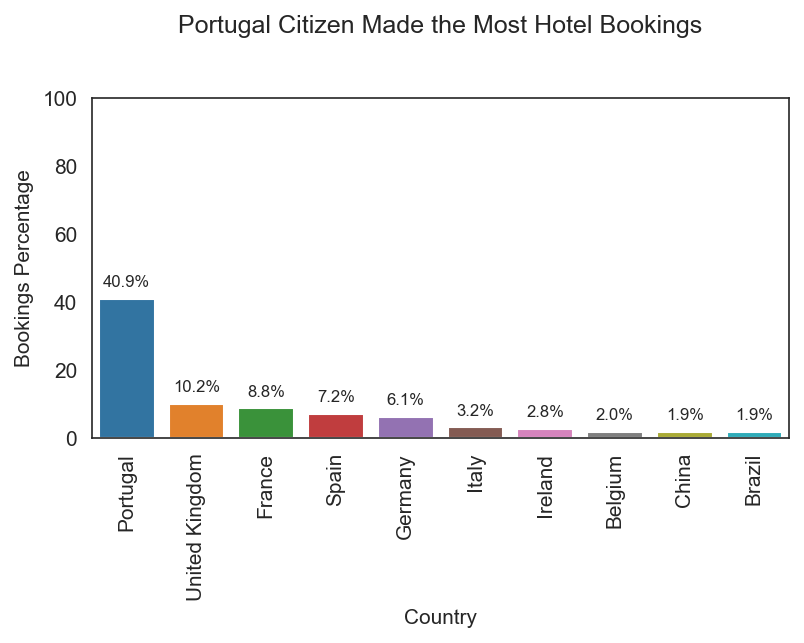

In [192]:
ax = sns.barplot(data=convert_pct_df(df, 'country')[:10], x='index', y='percent')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'Portugal Citizen Made the Most Hotel Bookings\n\n',
    'xlabel': 'Country',
    'ylabel': 'Bookings Percentage',
    'ylim': (0, 100)
}    
ax.set(**props)
plt.xticks(rotation=90)
plt.show()

From the graph above, we found out that Portugal made 40.9% of bookings for both city hotel and resort hotel in total. Despite that we also knew that citizens of Portugal made the highest booking cancellation rate for both city hotel and resort hotel. It is worth to find out which country made the most hotel bookings without cancellation.

### 9.4 Top 10 Countries Made the Most Hotel Bookings without Cancellation

In [196]:
df_no_cancellation = df[df['is_canceled'] == 0]

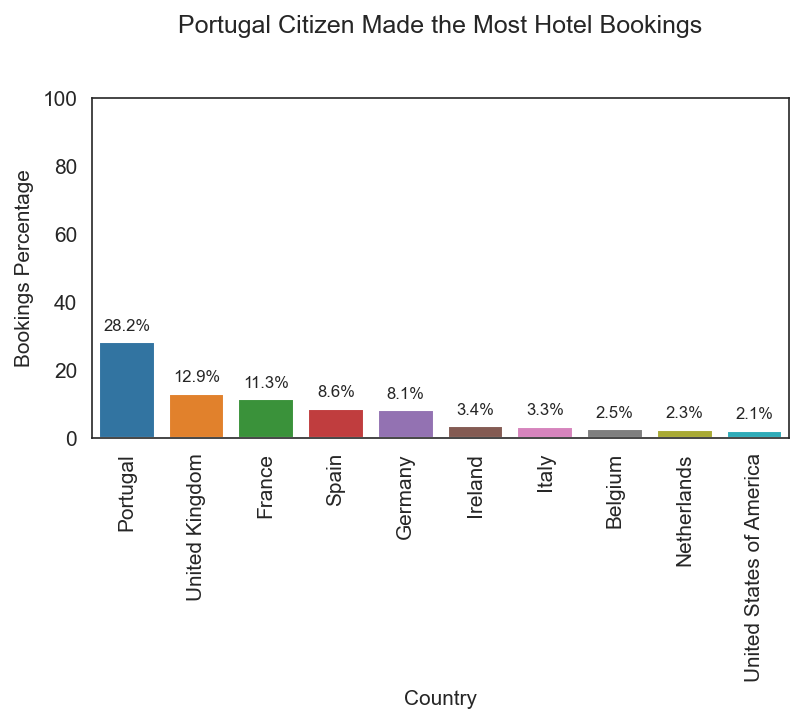

In [199]:
ax = sns.barplot(data=convert_pct_df(df_no_cancellation, 'country')[:10], x='index', y='percent')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'Portugal Citizen Made the Most Hotel Bookings\n\n',
    'xlabel': 'Country',
    'ylabel': 'Bookings Percentage',
    'ylim': (0, 100)
}    
ax.set(**props)
plt.xticks(rotation=90)
plt.show()

Based on the chart, we know that the citizen of Portugal made the highest hotel bookings without cancellation. Irony, they are also the one who made the highest hotel bookings cancellations. It will be insightful to further investigate why Portugal citizens have such a high rate of hotel bookings cancellation. By reducing the hotel bookings cancellation, this will lead to an increase of revenue for the hotels business owner.  
<br>

Moreover, citizens of Portugal, United Kingdom and France contributed over 50% hotels bookings wihout cancellation. Marketing department of the hotel can emphasis more on these three countries citizens to attract more guests.

### 9.5 Percentage of Booking Hotel Types

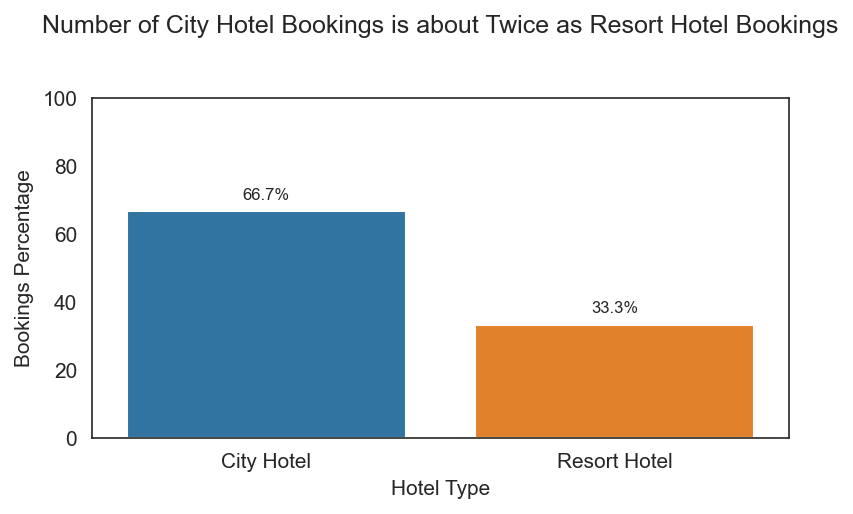

In [209]:
ax = sns.barplot(data=convert_pct_df(df, 'hotel'), x='index', y='percent')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f') + '%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

props = {
    'title': 'Number of City Hotel Bookings is about Twice as Resort Hotel Bookings\n\n',
    'xlabel': 'Hotel Type',
    'ylabel': 'Bookings Percentage',
    'ylim': (0, 100)
}
ax.set(**props)
plt.show()

### 9.6 Peak Season of Hotel Bookings

In [262]:
df_without_cancellation_by_hotel = df[(df['is_canceled'] == 0)].groupby('hotel')

Since the dataset is collected from 1st July of 2015 to 31 of Auguest 2017, there is a necessary to normalise the dataset.  

1st Year: 01/07/2015 - 30/06/2016  
2nd Year: 01/07/2016 - 30/06/2017  
3rd Year: 01/07/2017 - 31/08/2017  

In [277]:
def normalise_monthly_bookings(index, total_bookings):
    if index == 'July' or index == 'August':
        return int(total_bookings / 3)
    else:
        return int(total_bookings / 2)

In [282]:
monthly_bookings = df_without_cancellation_by_hotel['arrival_date_month'].value_counts().rename('total_monthly_bookings').reset_index() 
monthly_bookings['normalised_monthly_bookings'] = monthly_bookings[['arrival_date_month', 'total_monthly_bookings']].apply(lambda x: normalise_monthly_bookings(x['arrival_date_month'], x['total_monthly_bookings']), axis=1) 

In [302]:
monthly_bookings['month'] = pd.to_datetime(monthly_bookings['arrival_date_month'], format="%B").dt.month
monthly_bookings = monthly_bookings.sort_values('month')

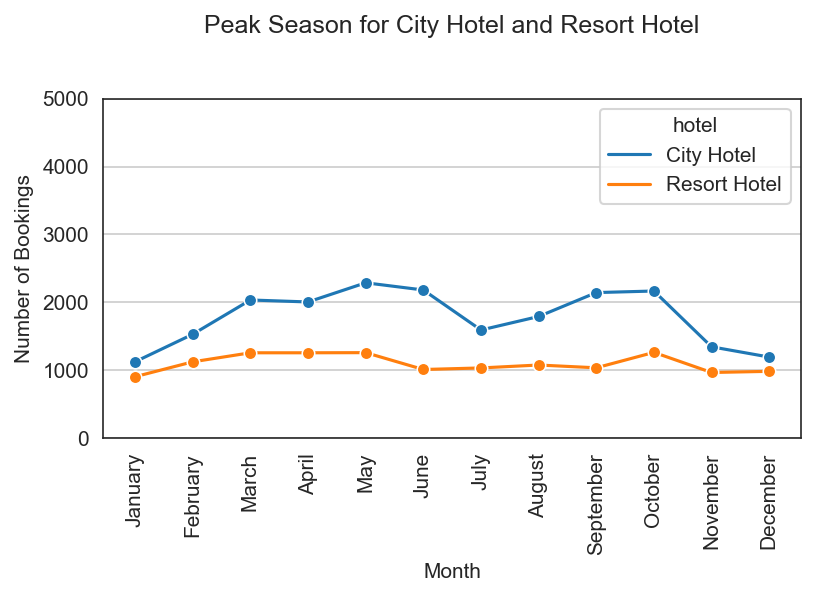

In [316]:
ax = sns.lineplot(data=monthly_bookings, 
                  x='arrival_date_month', 
                  y='normalised_monthly_bookings', 
                  hue='hotel',
                  marker='o')

props = {
    'title': 'Peak Season for City Hotel and Resort Hotel\n\n',
    'xlabel': 'Month',
    'ylabel': 'Number of Bookings',
    'ylim': (0, 5000)
}
for bar in ax.patches:
    ax.annotate(format(bar.get_y, '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_y()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.grid(axis='y')
ax.set(**props)
plt.show()

### 9.7 Variables that Affects Hotel Bookings Cancellation

In [324]:
pd.DataFrame(round(df.corr()['is_canceled'].sort_values(ascending=False).rename('correlation'), 2))

,correlation
is_canceled,1.00
lead_time,0.29
previous_cancellations,0.11
adults,0.06
days_in_waiting_list,0.05
adr,0.05
stays_in_week_nights,0.02
arrival_date_year,0.02
arrival_date_week_number,0.01
children,0.00


From the correation table, variable *lead_time* introduce a 0.29 weak positive correlation with variable *is_canceled*. As for the variable *total_of_special_requests*, it shows that is has a -0.24 weak negative correlation with variable *is_canceled*.  

The variables in the dataset don't signify any variables has a strong correlation with the variable *is_canceled*.